# Scalability Model (Storage Targets)

__28/06/2021__

## Storage Targets Test #05

- 8 computing nodes
- 8 clients (processes) per node.
- 5 storage targets.

In [1]:
# import sys  
# sys.path.insert(0, '/home/luan/Devel/luan-teylo/code/')

# from commons import csv, charts
# import pandas as pd

# dfa = csv.load_ior('csv/old/output.csv')
# dft = cmm.load_tracker_csv('csv/old/tracker.csv')


# # Create a new dataframe with the targets and the bandwidth
# columns  = ['target1', 'target2', 'target3', 'target4', 'target5']

# df = pd.DataFrame()
# df['bw'] = dfa['bw']
# df['targets'] = dft['targets']
# df[columns] = dft[columns]

# charts.bw_single_histogram(df, bins=20)
# print(f"Mean Bandwidth: {df['bw'].mean(): .2f} +/- {df['bw'].std(): .2f}")

# # Group storage targets to see how the allocation affects the BW
# grouped = df.groupby(columns).agg({'bw': ['count', 'mean', 'min', 'max']})

# # grouped_multiple.columns = ['bw_mean', 'bw_min', 'bw_max']
# grouped = grouped.reset_index()
# grouped

# re-execution

__15/07/2021__

In [2]:
import sys  
sys.path.insert(0, '/home/luan/Devel/luan-teylo/code/')

from commons import csv, charts
import pandas as pd
dfa = csv.load_ior('csv/output2.csv')
dft = cmm.load_tracker_csv('csv/tracker.csv')
n_targets=5

In [3]:
t0 = dft['ctime'][0]
dft['ctime'] = dft['ctime'].apply(lambda x: (x - t0))

In [4]:
# Create a new dataframe with the targets and the bandwidth
columns  = ['target1', 'target2', 'target3', 'target4', 'target5', 'ctime']

df = pd.DataFrame()
df['bw'] = dfa['bw']
df['start'] = dfa['start']
df['end'] = dfa['end']
df['targets'] = dft['targets']
df[columns] = dft[columns]

In [5]:
dk = df[:]

x = dk['ctime'].values.reshape((-1, 1))
y = dk['bw'].values.reshape((-1, 1))

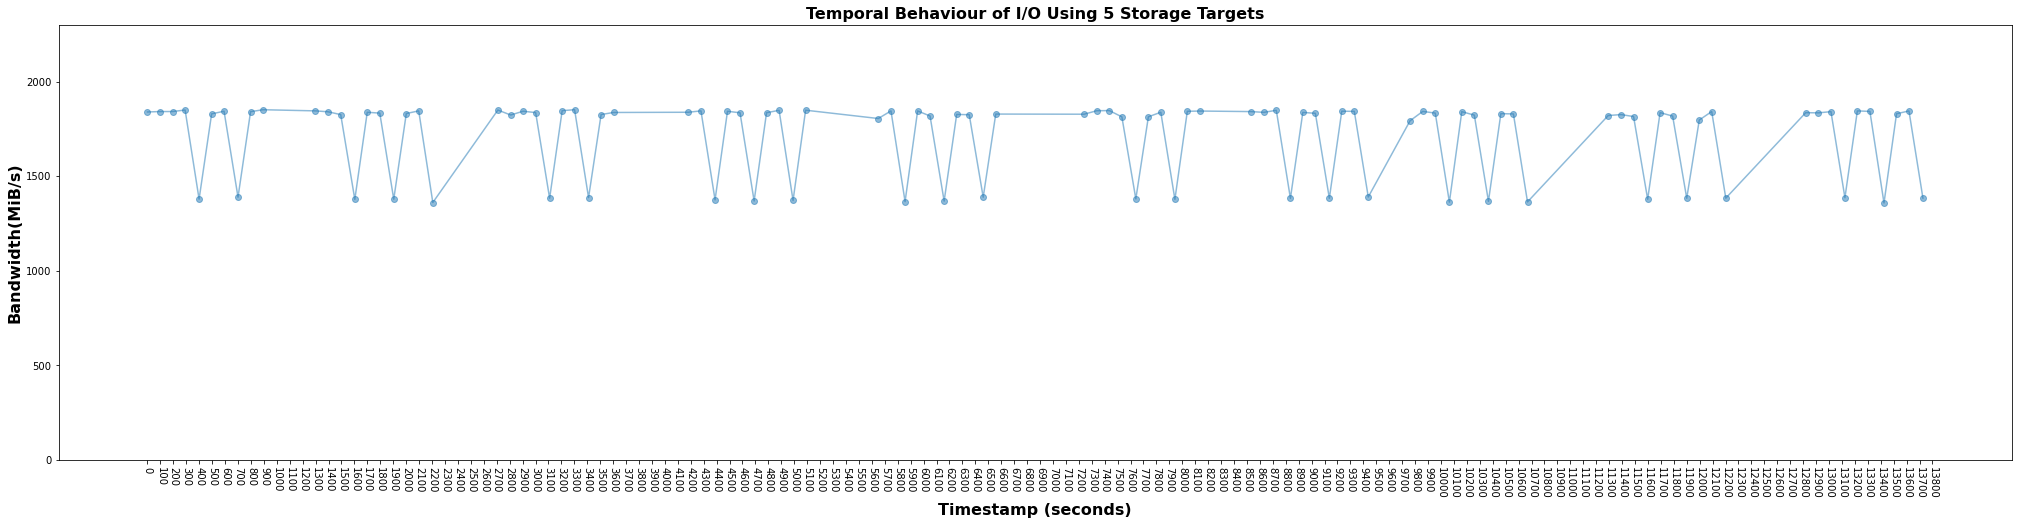

In [6]:
# %matplotlib notebook
from commons import csv, charts
from numpy import array, linspace
import numpy as np
import matplotlib.pyplot as plt
import math


fig, ax = plt.subplots()

fig.set_size_inches(35.0, 8, forward=True)


plt.plot(x, y, 'o-', alpha=0.5)

plt.xticks(range(0, 13900, 100))
plt.xticks(rotation=-90)

plt.ylabel('Bandwidth(MiB/s)',fontweight ='bold', fontsize=16)
plt.xlabel('Timestamp (seconds)', fontweight ='bold', fontsize=16)
plt.title(f"Temporal Behaviour of I/O Using {n_targets} Storage Targets", fontweight ='bold', fontsize=16)



plt.ylim([0, 2300])


# plt.grid()
# fig.savefig(f'../graph/{n_targets}st.pdf', format='pdf', dpi=1200)  

plt.show()

In [7]:
g_columns = ['target1', 'target2', 'target3', 'target4', 'target5']
gb = df.groupby(g_columns).agg({'bw': ['count','mean', 'min', 'max']})
gb.columns = ['bw_count','bw_mean', 'bw_min', 'bw_max']
gb = gb.reset_index()
gb

target1 target2 target3 target4 target5  bw_count      bw_mean   bw_min  \
0     101     102     103     104     204         5  1384.804000  1378.83   
1     101     102     103     203     204        24  1840.030833  1816.07   
2     101     102     202     203     204        15  1830.962000  1793.79   
3     102     103     104     201     202        25  1837.300800  1797.72   
4     103     104     201     202     203         9  1830.538889  1814.48   
5     104     201     202     203     204        22  1375.740000  1358.87   

    bw_max  
0  1389.32  
1  1852.17  
2  1847.59  
3  1850.50  
4  1852.38  
5  1390.74

In [8]:
# fig, ax =plt.subplots()
# fig.set_size_inches(35.0, 8, forward=True)
# ax.axis('tight')
# ax.axis('off')

# the_table = ax.table(cellText=gb.values,colLabels=gb.columns,loc='center')
# plt.title('Groups using 5 Storage Targets', size=16, fontweight ='bold')


# from matplotlib.backends.backend_pdf import PdfPages
# pp = PdfPages("../graph/table_5.pdf")
# pp.savefig(fig, bbox_inches='tight')
# pp.close()

In [9]:
df1 = df.loc[ (df['target1'] == '101') & (df['target2'] == '102') & (df['target3'] == '103') & (df['target4'] == '104')& (df['target5'] == '204')]
df2 = df.loc[ (df['target1'] == '101') & (df['target2'] == '102') & (df['target3'] == '103') & (df['target4'] == '203')& (df['target5'] == '204')]
df3 = df.loc[ (df['target1'] == '101') & (df['target2'] == '102') & (df['target3'] == '202') & (df['target4'] == '203')& (df['target5'] == '204')]
df4 = df.loc[ (df['target1'] == '102') & (df['target2'] == '103') & (df['target3'] == '104') & (df['target4'] == '201')& (df['target5'] == '202')]
df5 = df.loc[ (df['target1'] == '103') & (df['target2'] == '104') & (df['target3'] == '201') & (df['target4'] == '202')& (df['target5'] == '203')]
df6 = df.loc[ (df['target1'] == '104') & (df['target2'] == '201') & (df['target3'] == '202') & (df['target4'] == '203')& (df['target5'] == '204')]

__22/07/2021__

# Generating the boxplot graph

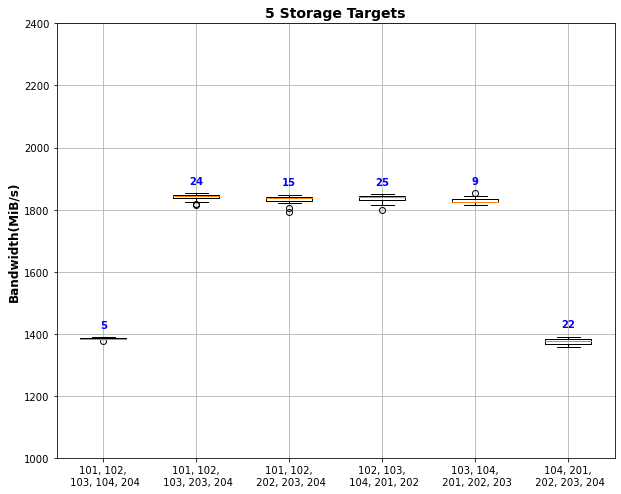

In [10]:
n_targets = 5


xlabels = ['101, 102,\n 103, 104, 204',
           '101, 102,\n 103, 203, 204',
           '101, 102,\n 202, 203, 204',
           '102, 103,\n 104, 201, 202',
           '103, 104,\n 201, 202, 203',
           '104, 201,\n 202, 203, 204']

dframes = [df1, df2, df3, df4, df5, df6]

cmm.boxplot(xlabels=xlabels, values=[d['bw'].values for d in dframes], 
            title=f"{n_targets} Storage Targets",
            ylabel='Bandwidth(MiB/s)',
            xlabel='',
            save_to=f'../graphs/boxplot/{n_targets}_boxplot.pdf',
            ylim=[1000,2400],
            rotation_x=0.0,
            dframes=dframes,
           plot_obs=True)


In [11]:
# fig, ax = plt.subplots()

# fig.set_size_inches(35.0, 8, forward=True)

# plt.plot(x, y, '-', alpha=0.3)

# plt.xticks(range(0, 14100, 100))
# plt.xticks(rotation=-90)

# plt.ylabel('Bandwidth(MiB/s)',fontweight ='bold', fontsize=16)
# plt.xlabel('Timestamp (seconds)', fontweight ='bold', fontsize=16)
# plt.title("Temporal Behaviour of I/O Using 5 Storage Targets", fontweight ='bold', fontsize=24)

# plt.ylim([0, 2300])


# plt.scatter(df1['ctime'].values.reshape((-1, 1)), df1['bw'].values.reshape((-1, 1)), color='red', label='101, 102, 103, 104 and 204')
# plt.scatter(df2['ctime'].values.reshape((-1, 1)), df2['bw'].values.reshape((-1, 1)), color='purple', label='101, 102, 103, 203 and 204')
# plt.scatter(df3['ctime'].values.reshape((-1, 1)), df3['bw'].values.reshape((-1, 1)), color='green', label='101, 102, 202, 203 and 204')
# plt.scatter(df4['ctime'].values.reshape((-1, 1)), df4['bw'].values.reshape((-1, 1)), color='black', label='102, 103, 104, 201 and 202')
# plt.scatter(df5['ctime'].values.reshape((-1, 1)), df5['bw'].values.reshape((-1, 1)), color='yellow', label='103, 104, 201, 202 and 203')
# plt.scatter(df6['ctime'].values.reshape((-1, 1)), df6['bw'].values.reshape((-1, 1)), color='blue', label='104, 201, 202, 203 and 204')



# plt.legend(fontsize=16)
# # plt.grid()
# fig.savefig('../graph/5st.pdf', format='pdf', dpi=1200)  

# plt.show()